# 1.NSCLC Sex-stratified SC Analysis

## Data selection, pseudobulk, create input for DESEQ2

Using pertpy as workaround for sccoda installation because of issues with conda environment and scanpy

In [1]:
import scanpy as sc

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pertpy as pt

/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
import numpy as np

In [4]:
import pandas as pd

In [28]:
import seaborn as sns

In [5]:
from matplotlib import cm, rcParams

In [31]:
from scipy.stats import wilcoxon

In [6]:
#import warnings
#import numpy as np
#import pandas as pd 
#import scanpy as sc
#import matplotlib.pyplot as plt
#import matplotlib
#import seaborn as sns

In [7]:
#import importlib
#import warnings
#warnings.filterwarnings("ignore")
#import pandas as pd
#import pickle as pkl
#import matplotlib.pyplot as plt

In [8]:
#import seaborn as sns
#import matplotlib.pyplot as plt

In [9]:
#from statannotations.Annotator import Annotator

In [10]:
#from scipy.stats import wilcoxon

In [11]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk/"
resDir = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/figures/"
input_path = f"{path}paired_adata_clean_luad.h5ad"

In [12]:
adata = sc.read_h5ad(input_path) 

## SCCODA

In [13]:
adata.obs

,sample,uicc_stage,ever_smoker,age,donor_id,origin,dataset,ann_fine,cell_type_predicted,doublet_status,...,sex_ontology_term_id,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCTGAGATATGCA.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACCTGAGCACCGTC.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACCTGGTCGTCTTC.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACCTGGTGTCGCTG.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACGGGAGGTGCTTT.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGCCTTGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,T cell CD4,NaN,singlet,...,PATO:0000383,UBERON:0002048,CD4+ T cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage
TTTGTCACAGGTCGTC-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,T cell CD4,NaN,singlet,...,PATO:0000383,UBERON:0002048,CD4+ T cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage
TTTGTCACATCTATGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage
TTTGTCAGTGTTGGGA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage


In [14]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["origin","dataset","disease","sex","donor_id"],
)
print(sccoda_data)
print(sccoda_data["coda"].X)
print(sccoda_data["coda"].obs)

MuData object with n_obs × n_vars = 350242 × 17820
  2 modalities
    rna:	350066 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [15]:
# Select control and salmonella data
sccoda_data.mod["coda_tumor_normal"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["origin"].isin(["normal_adjacent", "tumor_primary"])
].copy()
print(sccoda_data["coda_tumor_normal"])

AnnData object with n_obs × n_vars = 176 × 9
    obs: 'disease', 'donor_id', 'sex', 'dataset', 'origin', 'sample'
    var: 'n_cells'


In [16]:
sccoda_data

MuData object with n_obs × n_vars = 350242 × 17820
  3 modalities
    rna:	350066 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	176 x 9
      obs:	'disease', 'donor_id', 'sex', 'dataset', 'origin', 'sample'
      var:	'n_cells'
    coda_tumor_normal:	176 x 9
      obs:	'disease', 'donor_id', 'sex', 'dataset', 'origin', 'sample'
      var:	'n_cells'

In [18]:
#plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

In [24]:
#significance_level = 0.05  
#
#cell_types = plot_df['Cell type'].unique()
#
#
#for cell_type in cell_types:
#    male_fractions = plot_df[(plot_df['cell_type'] == cell_type) & (plot_df['sex'] == 'male')]['fraction'].dropna()
#    female_fractions = plot_df[(plot_df['cell_type'] == cell_type) & (plot_df['sex'] == 'female')]['fraction'].dropna()
#
#    # Ensure the lengths are equal by truncating the longer list
#    min_length = min(len(male_fractions), len(female_fractions))
#    male_fractions = male_fractions[:min_length]
#    female_fractions = female_fractions[:min_length]
#    
#    # Perform wilcoxon Test
#    stat, p_value = wilcoxon(male_fractions, female_fractions)
#        
#    if p_value < significance_level:
#        x_position = list(cell_types).index(cell_type)
#        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
#        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)


In [26]:
sccoda_data["coda_tumor_normal"].obs["origin_sex"] = sccoda_data["coda_tumor_normal"].obs["origin"].astype(str) + "_" + sccoda_data["coda_tumor_normal"].obs["sex"].astype(str)

In [ ]:
#sccoda_data["coda_tumor_normal"]

In [ ]:
#plot_df

/tmp/ipykernel_3396411/2837515742.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


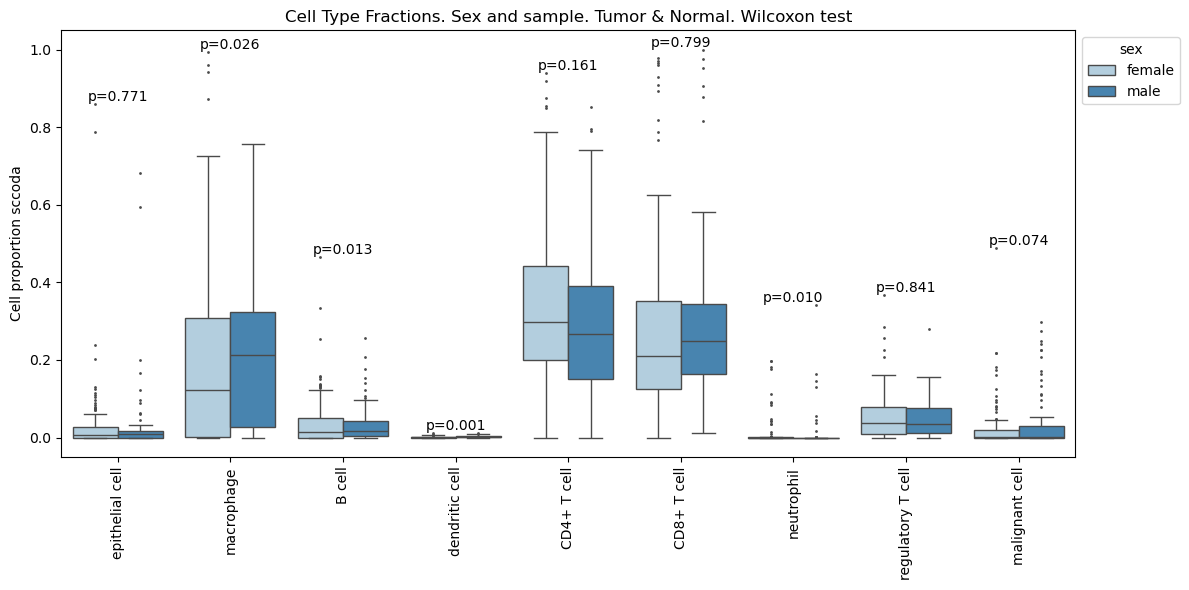

In [32]:
data =sccoda_data["coda_tumor_normal"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "sex"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['sex'] == 'male')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['sex'] == 'female')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Sex and sample. Tumor & Normal. Wilcoxon test')
plt.tight_layout()


/tmp/ipykernel_3396411/2701346773.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


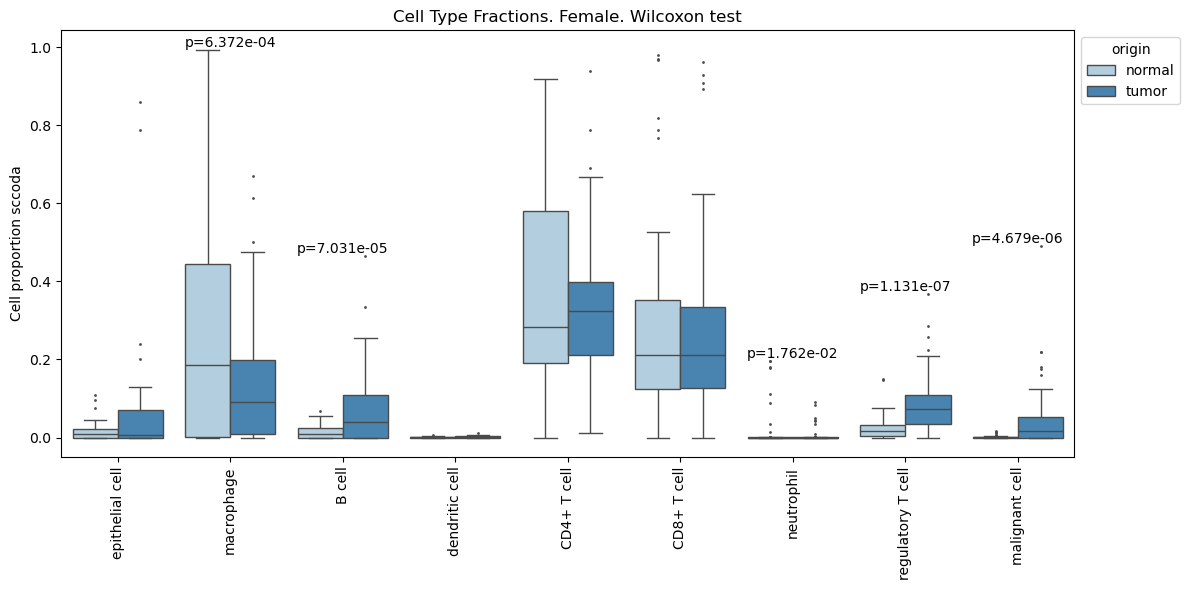

In [33]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["sex"]=="female"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "origin"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'tumor')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'normal')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Female. Wilcoxon test')
plt.tight_layout()


/tmp/ipykernel_3396411/1763599923.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


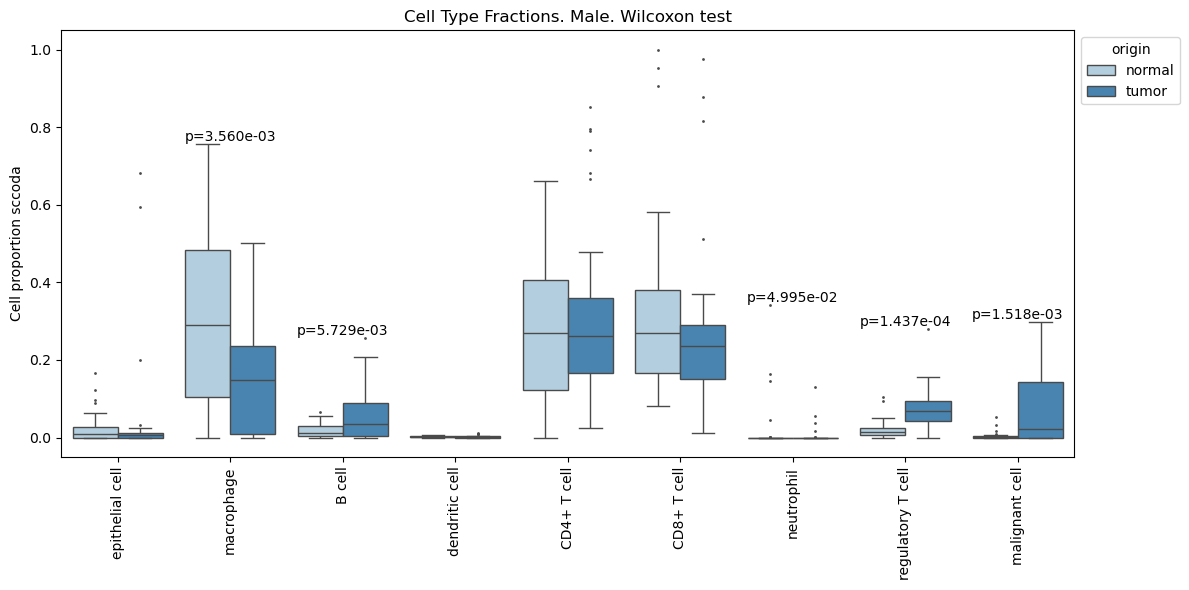

In [34]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["sex"]=="male"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "origin"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'tumor')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'normal')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Male. Wilcoxon test')
plt.tight_layout()


In [ ]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [ ]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

In [77]:

# Step 1: Count rows per donor_id in each DataFrame
count_tumor_data = tumor_data.groupby('donor_id').size().reset_index(name='count_A')
count_normal_data = normal_data.groupby('donor_id').size().reset_index(name='count_B')

# Step 2: Merge the counts on donor_id
merged_counts = pd.merge(count_tumor_data, count_normal_data, on='donor_id', how='outer')

# Step 3: Identify donor_ids where counts are different
donors_to_remove = merged_counts[merged_counts['count_A'] != merged_counts['count_B']]['donor_id']

# Step 4: Remove donor_ids with mismatched counts from both A and B
tumor_data_cleaned = tumor_data[~tumor_data['donor_id'].isin(donors_to_remove)]
normal_data_cleaned = normal_data[~normal_data['donor_id'].isin(donors_to_remove)]

NameError: name 'tumor_data' is not defined

In [ ]:
#sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_tumor_normal", feature_name="origin")
#plt.show()

In [36]:
data =sccoda_data["coda_tumor_normal"]
feature_name = "origin"
figsize=(5, 6)
dpi = 100
cmap = cm.tab20
plot_legend = True
level_order = None



# cell type names
type_names = data.var.index

# option to plot one stacked barplot per sample
if feature_name == "samples":
    if level_order:
        assert set(level_order) == set(data.obs.index), "level order is inconsistent with levels"
        data = data[level_order]
    g = stackbar(
        data.X,
        type_names=data.var.index,
        title="samples",
        level_names=data.obs.index,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
else:
    # Order levels
    if level_order:
        assert set(level_order) == set(data.obs[feature_name]), "level order is inconsistent with levels"
        levels = level_order
    elif hasattr(data.obs[feature_name], 'cat'):
        levels = data.obs[feature_name].cat.categories.to_list()
    else:
        levels = pd.unique(data.obs[feature_name])
    n_levels = len(levels)
    feature_totals = np.zeros([n_levels, data.X.shape[1]])

    for level in range(n_levels):
        l_indices = np.where(data.obs[feature_name] == levels[level])
        feature_totals[level] = np.sum(data.X[l_indices], axis=0)

    g = stackbar(
        feature_totals,
        type_names=type_names,
        title=feature_name,
        level_names=levels,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)


    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Proportion of Cell Types')
    plt.title('')
    plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

NameError: name 'stackbar' is not defined

In [37]:
data =sccoda_data["coda_tumor_normal"]
feature_name = "sex"
figsize=(5, 6)
dpi = 100
cmap = cm.tab20
plot_legend = True
level_order = None



# cell type names
type_names = data.var.index

# option to plot one stacked barplot per sample
if feature_name == "samples":
    if level_order:
        assert set(level_order) == set(data.obs.index), "level order is inconsistent with levels"
        data = data[level_order]
    g = stackbar(
        data.X,
        type_names=data.var.index,
        title="samples",
        level_names=data.obs.index,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
else:
    # Order levels
    if level_order:
        assert set(level_order) == set(data.obs[feature_name]), "level order is inconsistent with levels"
        levels = level_order
    elif hasattr(data.obs[feature_name], 'cat'):
        levels = data.obs[feature_name].cat.categories.to_list()
    else:
        levels = pd.unique(data.obs[feature_name])
    n_levels = len(levels)
    feature_totals = np.zeros([n_levels, data.X.shape[1]])

    for level in range(n_levels):
        l_indices = np.where(data.obs[feature_name] == levels[level])
        feature_totals[level] = np.sum(data.X[l_indices], axis=0)

    g = stackbar(
        feature_totals,
        type_names=type_names,
        title=feature_name,
        level_names=levels,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
       # Add labels and title
    plt.xlabel('')
    plt.ylabel('Proportion of Cell Types. T&N')
    plt.title('')
    plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()


NameError: name 'stackbar' is not defined

In [ ]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["origin"]=="tumor_primary"]
feature_name = "sex"
figsize=(5, 6)
dpi = 100
cmap = cm.tab20
plot_legend = True
level_order = None



# cell type names
type_names = data.var.index

# option to plot one stacked barplot per sample
if feature_name == "samples":
    if level_order:
        assert set(level_order) == set(data.obs.index), "level order is inconsistent with levels"
        data = data[level_order]
    g = stackbar(
        data.X,
        type_names=data.var.index,
        title="samples",
        level_names=data.obs.index,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
else:
    # Order levels
    if level_order:
        assert set(level_order) == set(data.obs[feature_name]), "level order is inconsistent with levels"
        levels = level_order
    elif hasattr(data.obs[feature_name], 'cat'):
        levels = data.obs[feature_name].cat.categories.to_list()
    else:
        levels = pd.unique(data.obs[feature_name])
    n_levels = len(levels)
    feature_totals = np.zeros([n_levels, data.X.shape[1]])

    for level in range(n_levels):
        l_indices = np.where(data.obs[feature_name] == levels[level])
        feature_totals[level] = np.sum(data.X[l_indices], axis=0)

    g = stackbar(
        feature_totals,
        type_names=type_names,
        title=feature_name,
        level_names=levels,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
       # Add labels and title
    plt.xlabel('')
    plt.ylabel('Proportion of Cell Types. Tumor')
    plt.title('')
    plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()


In [ ]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["origin"]=="normal_adjacent"]
feature_name = "sex"
figsize=(5, 6)
dpi = 100
cmap = cm.tab20
plot_legend = True
level_order = None



# cell type names
type_names = data.var.index

# option to plot one stacked barplot per sample
if feature_name == "samples":
    if level_order:
        assert set(level_order) == set(data.obs.index), "level order is inconsistent with levels"
        data = data[level_order]
    g = stackbar(
        data.X,
        type_names=data.var.index,
        title="samples",
        level_names=data.obs.index,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
else:
    # Order levels
    if level_order:
        assert set(level_order) == set(data.obs[feature_name]), "level order is inconsistent with levels"
        levels = level_order
    elif hasattr(data.obs[feature_name], 'cat'):
        levels = data.obs[feature_name].cat.categories.to_list()
    else:
        levels = pd.unique(data.obs[feature_name])
    n_levels = len(levels)
    feature_totals = np.zeros([n_levels, data.X.shape[1]])

    for level in range(n_levels):
        l_indices = np.where(data.obs[feature_name] == levels[level])
        feature_totals[level] = np.sum(data.X[l_indices], axis=0)

    g = stackbar(
        feature_totals,
        type_names=type_names,
        title=feature_name,
        level_names=levels,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
       # Add labels and title
    plt.xlabel('')
    plt.ylabel('Proportion of Cell Types. Normal')
    plt.title('')
    plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()


In [38]:
grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')

/tmp/ipykernel_3396411/1754364519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')


In [39]:
grouped

,cell_type,origin,cell_count
0,epithelial cell,normal_adjacent,4957
1,epithelial cell,tumor_primary,16082
2,macrophage,normal_adjacent,65453
3,macrophage,tumor_primary,38818
4,B cell,normal_adjacent,2888
5,B cell,tumor_primary,13965
6,dendritic cell,normal_adjacent,348
7,dendritic cell,tumor_primary,579
8,CD4+ T cell,normal_adjacent,45654
9,CD4+ T cell,tumor_primary,48849


In [40]:
# Create a Boolean mask for the cells that you want to keep
mask = ~((adata.obs['origin'] == 'normal_adjacent') & (adata.obs['cell_type'] == 'malignant cell'))

# Subset the adata object using the mask to exclude the specific cells
adata = adata[mask].copy()

# Now `adata_filtered` contains all cells except those with origin == 'normal_adjacent' and cell_type == 'malignant cell'


In [41]:
grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')
grouped

/tmp/ipykernel_3396411/1277960507.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')


,cell_type,origin,cell_count
0,epithelial cell,normal_adjacent,4957
1,epithelial cell,tumor_primary,16082
2,macrophage,normal_adjacent,65453
3,macrophage,tumor_primary,38818
4,B cell,normal_adjacent,2888
5,B cell,tumor_primary,13965
6,dendritic cell,normal_adjacent,348
7,dendritic cell,tumor_primary,579
8,CD4+ T cell,normal_adjacent,45654
9,CD4+ T cell,tumor_primary,48849


In [42]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [43]:
set(adata_normal.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'neutrophil',
 'regulatory T cell'}

In [44]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

In [45]:
set(adata_normal.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'neutrophil',
 'regulatory T cell'}

In [46]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [47]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

/tmp/ipykernel_3396411/1990054796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)


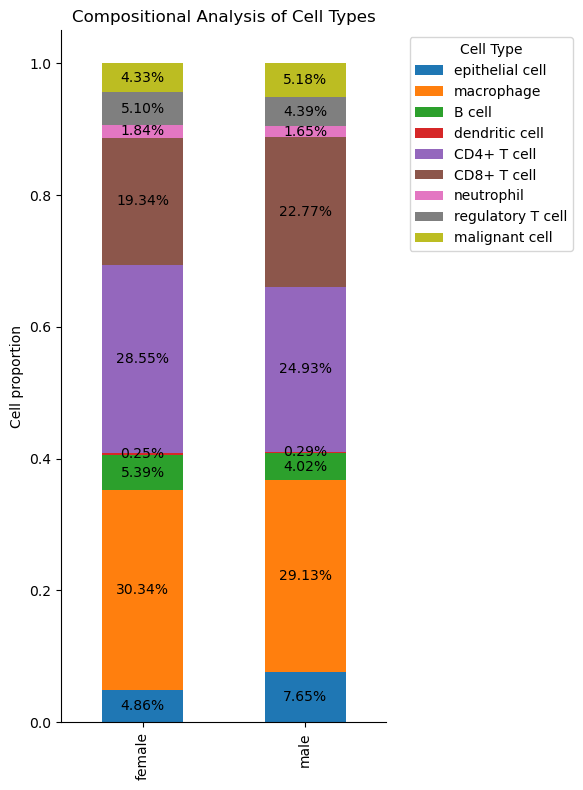

In [48]:
cell_type_counts = adata.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(6, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis of Cell Types')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_cell_type.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/2467436322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['sex', 'dataset']).size().unstack(fill_value=0)


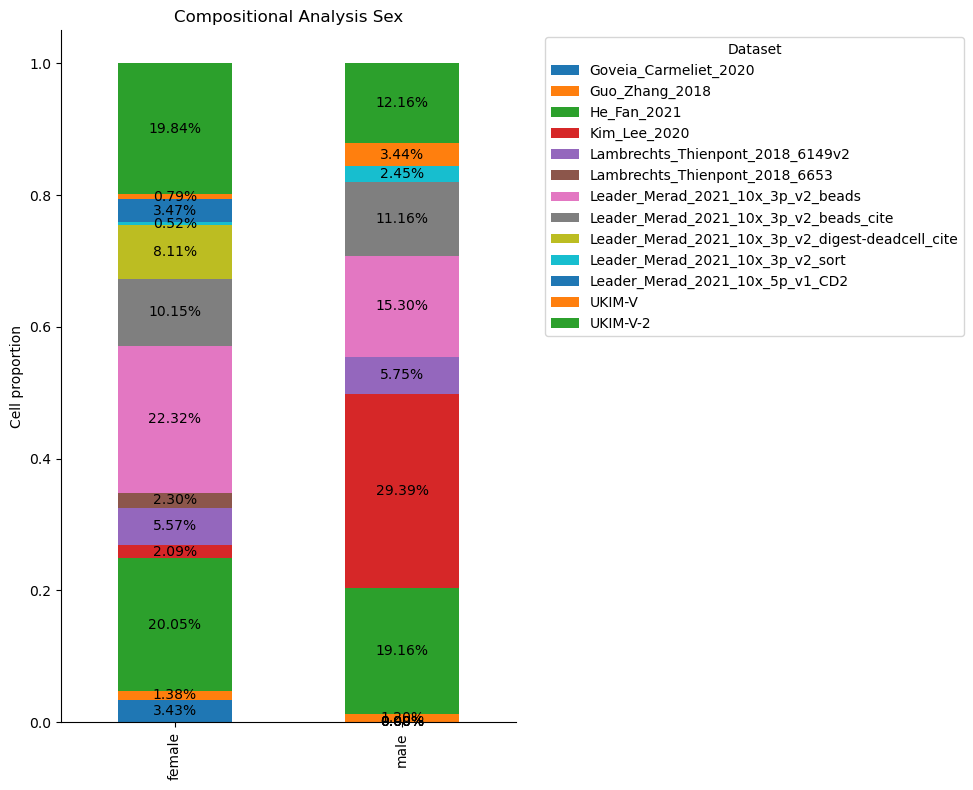

In [49]:
cell_type_counts = adata.obs.groupby(['sex', 'dataset']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Sex')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_dataset_sex.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/3234691261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['origin', 'dataset']).size().unstack(fill_value=0)


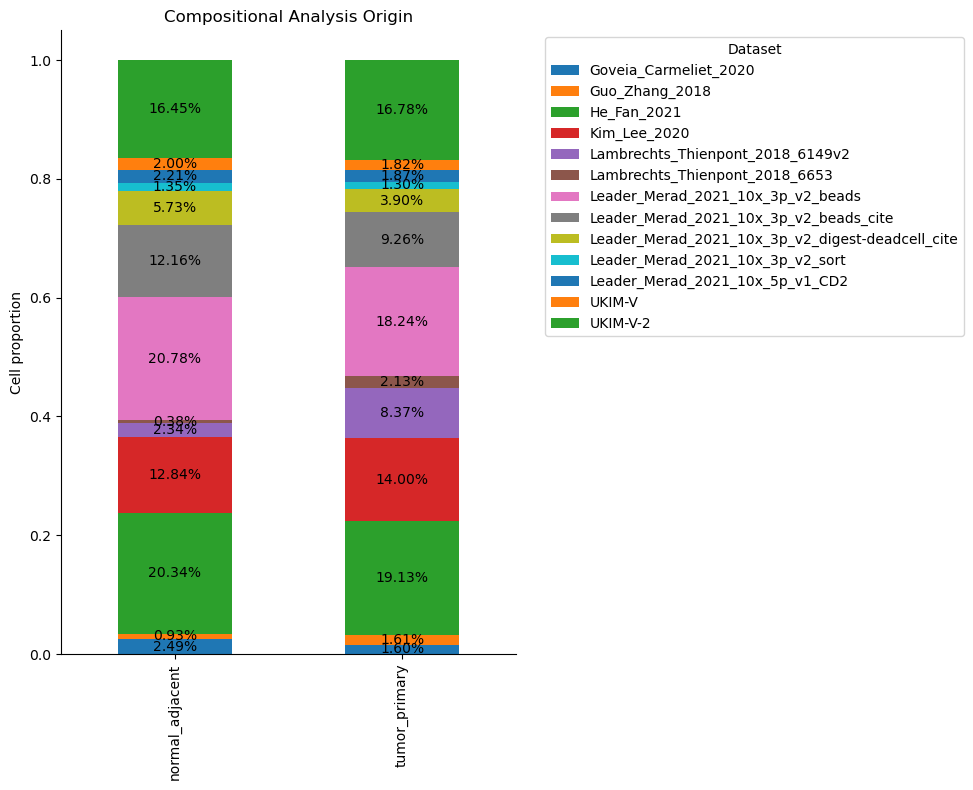

In [50]:
cell_type_counts = adata.obs.groupby(['origin', 'dataset']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Origin')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_origin_dataset.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/2321632022.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['origin', 'cell_type']).size().unstack(fill_value=0)


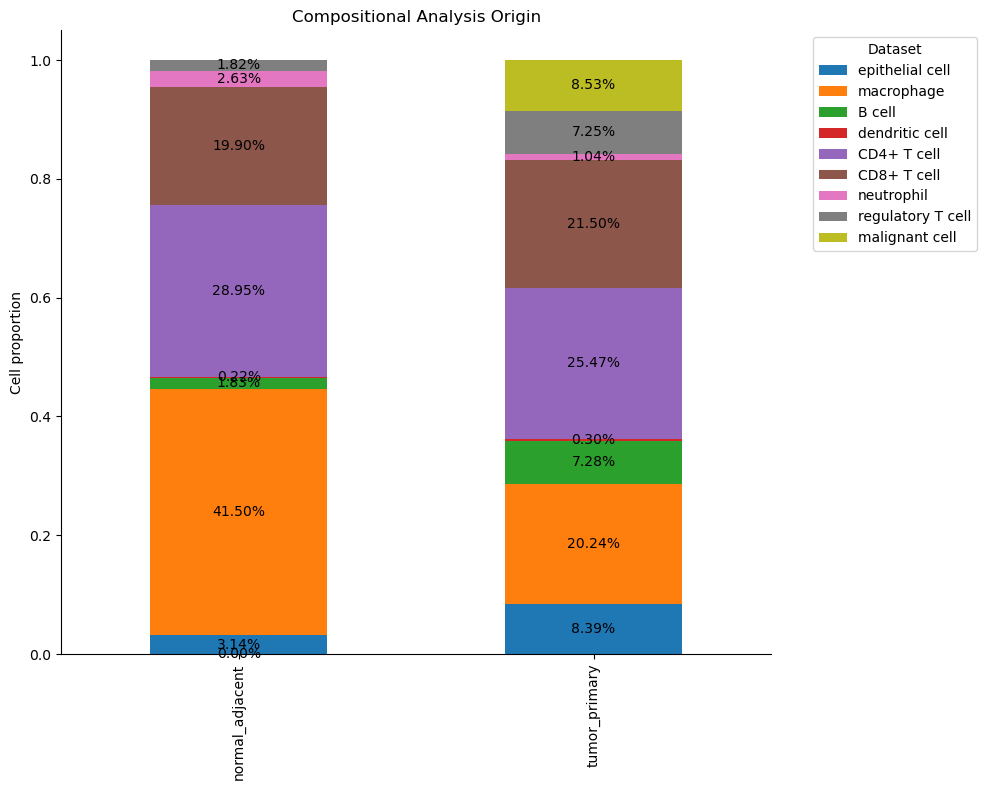

In [51]:
cell_type_counts = adata.obs.groupby(['origin', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Origin')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_origin_cell_type.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/2409803617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['cell_type', 'sex']).size().unstack(fill_value=0)


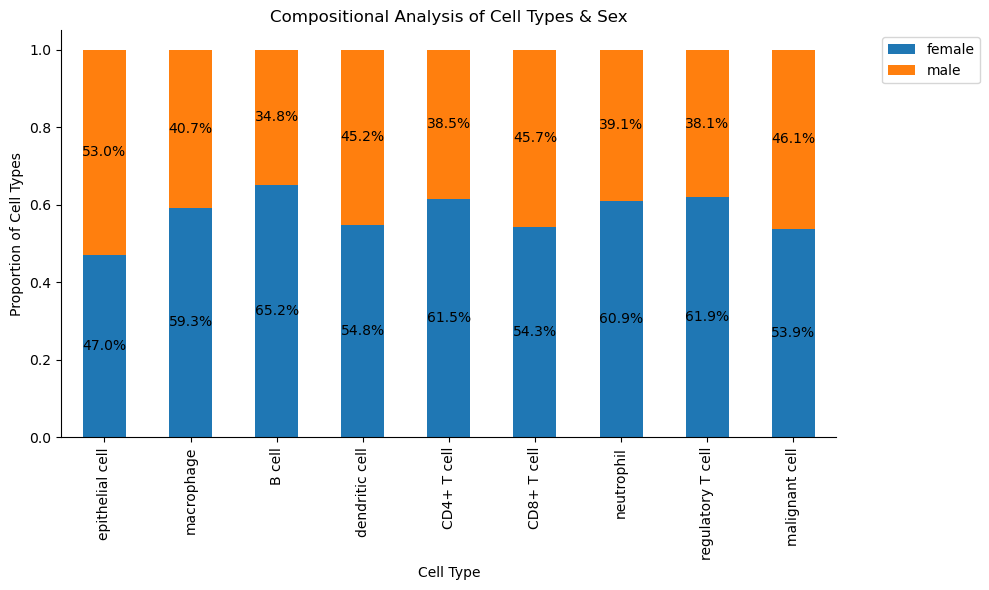

In [52]:
cell_type_counts = adata.obs.groupby(['cell_type', 'sex']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)
ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center')

# Remove the plot frame (all spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Add labels and title
plt.xlabel('Cell Type')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types & Sex')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_cell_type_sex.png', bbox_inches='tight')
# Show the plot
plt.show()


In [53]:
cell_type_counts

sex,female,male
cell_type,,
epithelial cell,9890,11149
macrophage,61796,42475
B cell,10987,5866
dendritic cell,508,419
CD4+ T cell,58149,36354
CD8+ T cell,39400,33203
neutrophil,3744,2402
regulatory T cell,10389,6396
malignant cell,8815,7550


In [54]:
cell_type_proportions

sex,female,male
cell_type,,
epithelial cell,0.470079,0.529921
macrophage,0.592648,0.407352
B cell,0.651931,0.348069
dendritic cell,0.548004,0.451996
CD4+ T cell,0.615314,0.384686
CD8+ T cell,0.542677,0.457323
neutrophil,0.609177,0.390823
regulatory T cell,0.618945,0.381055
malignant cell,0.538650,0.461350


/tmp/ipykernel_3396411/895388356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()
/tmp/ipykernel_3396411/895388356.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/895388356.py:6: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categorical.py:3399

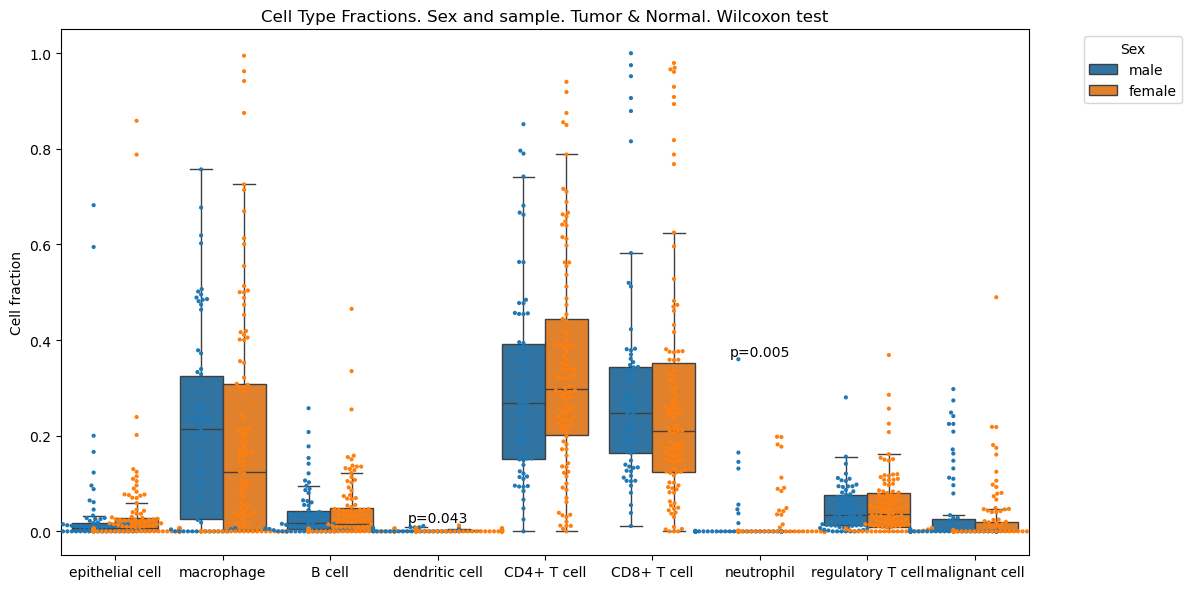

In [55]:
data = adata.obs[['sex', 'cell_type', 'sample']]
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor & Normal. Wilcoxon test')

# Adjust layout
plt.tight_layout()

#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_tn.png', bbox_inches='tight')
# Show the plot
plt.show()


/tmp/ipykernel_3396411/3580362177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()
/tmp/ipykernel_3396411/3580362177.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/3580362177.py:6: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categorical.py:3

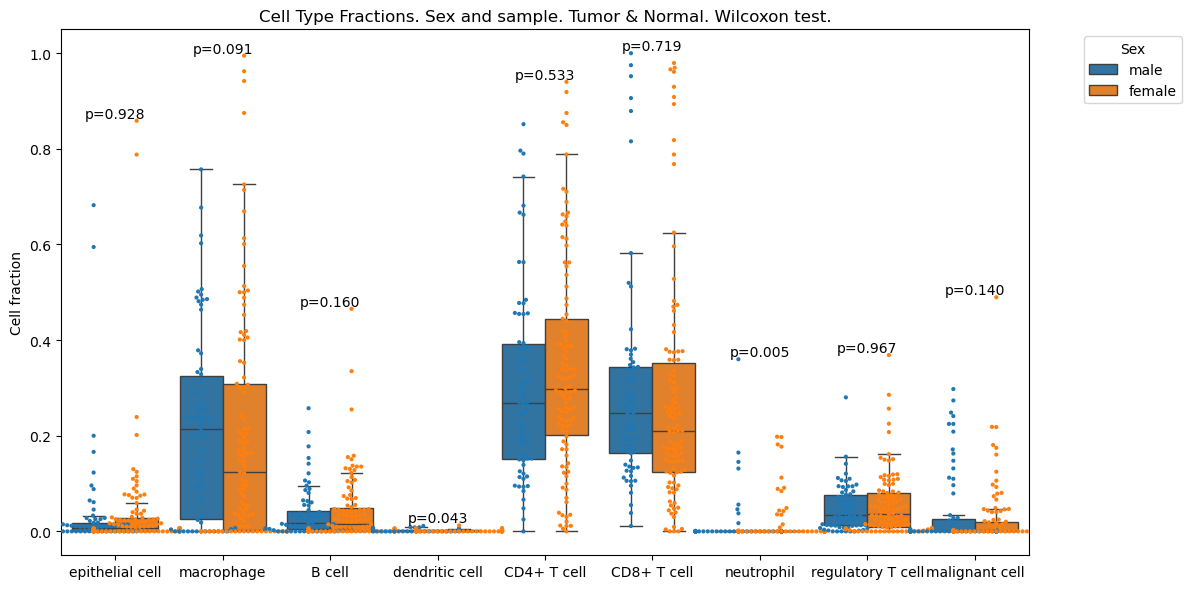

In [56]:
data = adata.obs[['sex', 'cell_type', 'sample']]
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
vswarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor & Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()

#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_tn_allpvalues.png', bbox_inches='tight')
# Show the plot
plt.show()


/tmp/ipykernel_3396411/2845310640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata[adata.obs["origin"]=="tumor_primary"].obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)


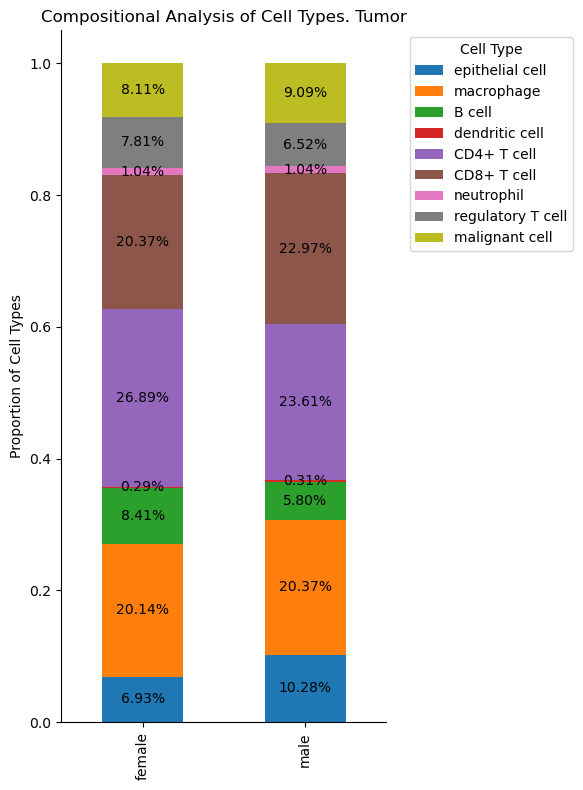

In [57]:
cell_type_counts = adata[adata.obs["origin"]=="tumor_primary"].obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(6, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types. Tumor')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_cell_type_tumor.png', bbox_inches='tight')

# Show the plot
plt.show()


In [58]:
len(adata.obs)

349492

In [59]:
adata.obs.origin.value_counts()

origin
tumor_primary      191783
normal_adjacent    157709
Name: count, dtype: int64

In [60]:
cell_type_counts

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell,malignant cell
sex,,,,,,,,,
female,7537,21890,9145,318,29234,22141,1128,8490,8815
male,8545,16928,4820,261,19615,19084,863,5419,7550


In [61]:
cell_type_proportions

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell,malignant cell
sex,,,,,,,,,
female,0.069339,0.201384,0.084132,0.002926,0.268947,0.203693,0.010377,0.078106,0.081096
male,0.102846,0.203743,0.058013,0.003141,0.236084,0.229692,0.010387,0.065222,0.090871


/tmp/ipykernel_3396411/2970408315.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()
/tmp/ipykernel_3396411/2970408315.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/2970408315.py:8: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categorical.py:3

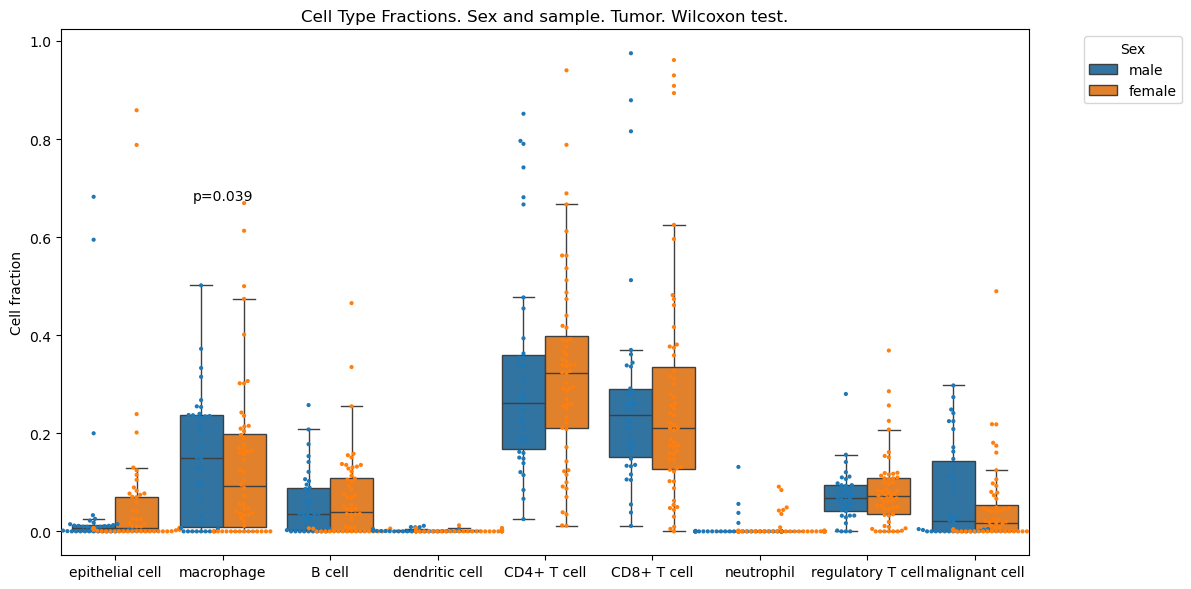

In [62]:
data = adata_tumor.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor. Wilcoxon test.')

# Adjust layout
plt.tight_layout()

#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_t.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/2874282889.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()
/tmp/ipykernel_3396411/2874282889.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/2874282889.py:8: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categorical.py:3

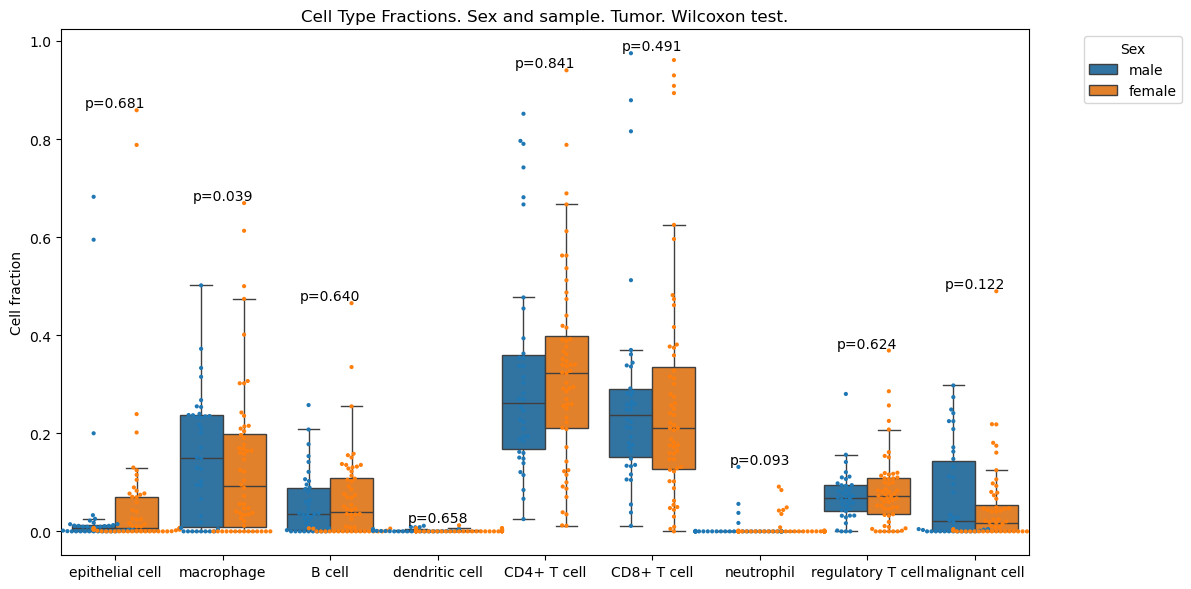

In [63]:
data = adata_tumor.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor. Wilcoxon test.')

# Adjust layout
plt.tight_layout()

#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_t_allpvalues.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/3018741817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_normal.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)


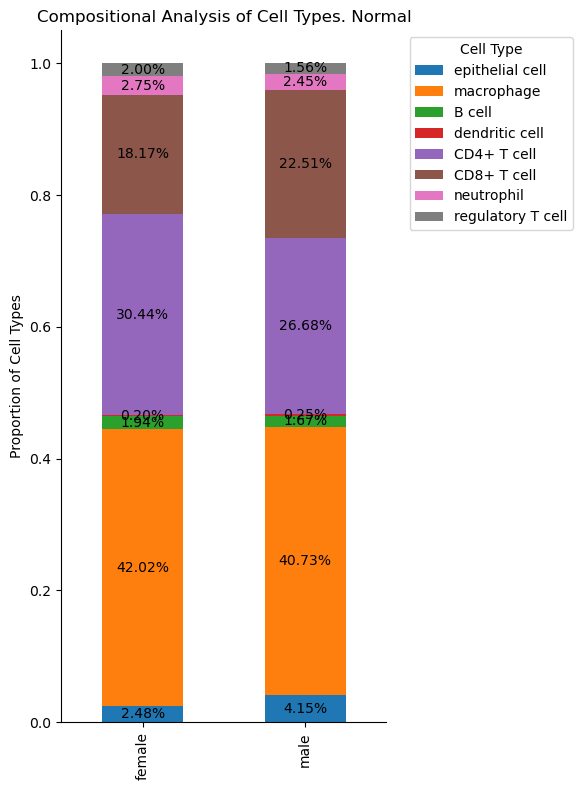

In [64]:
cell_type_counts = adata_normal.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(6, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types. Normal')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_cell_type_normal.png', bbox_inches='tight')

# Show the plot
plt.show()


In [65]:
cell_type_counts

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell
sex,,,,,,,,
female,2353,39906,1842,190,28915,17259,2616,1899
male,2604,25547,1046,158,16739,14119,1539,977


In [66]:
cell_type_proportions

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell
sex,,,,,,,,
female,0.024774,0.420152,0.019394,0.002000,0.304433,0.181712,0.027543,0.019994
male,0.041512,0.407260,0.016675,0.002519,0.266846,0.225079,0.024534,0.015575


/tmp/ipykernel_3396411/203106031.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()
/tmp/ipykernel_3396411/203106031.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/203106031.py:9: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categorical.py:3399

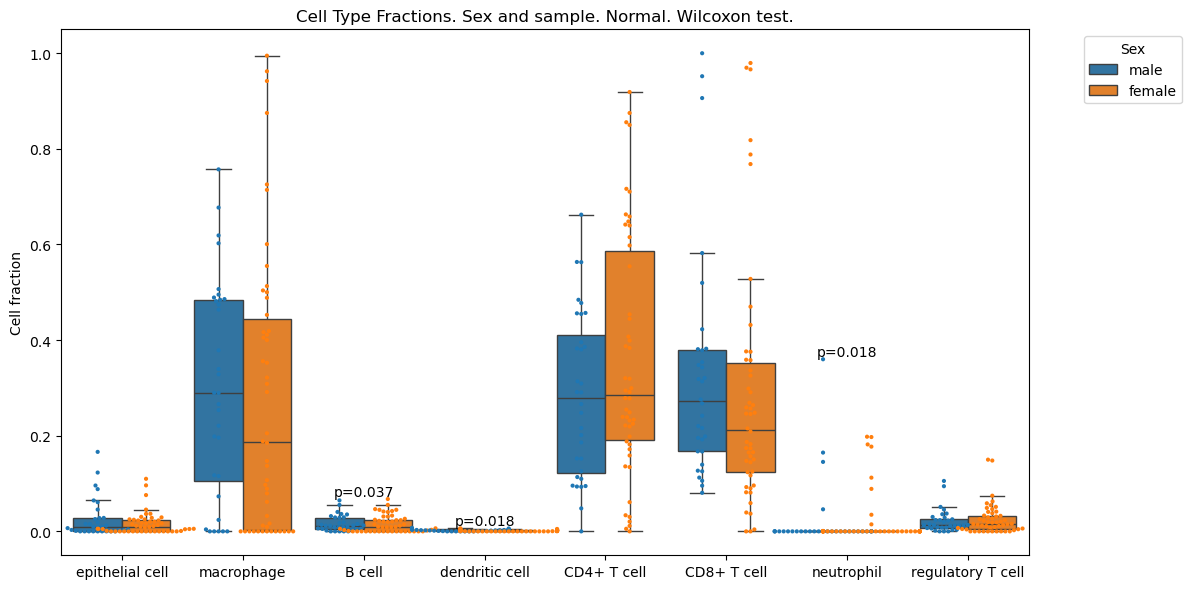

In [67]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_normal.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_n.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/3999128085.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()
/tmp/ipykernel_3396411/3999128085.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/3999128085.py:9: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categorical.py:3

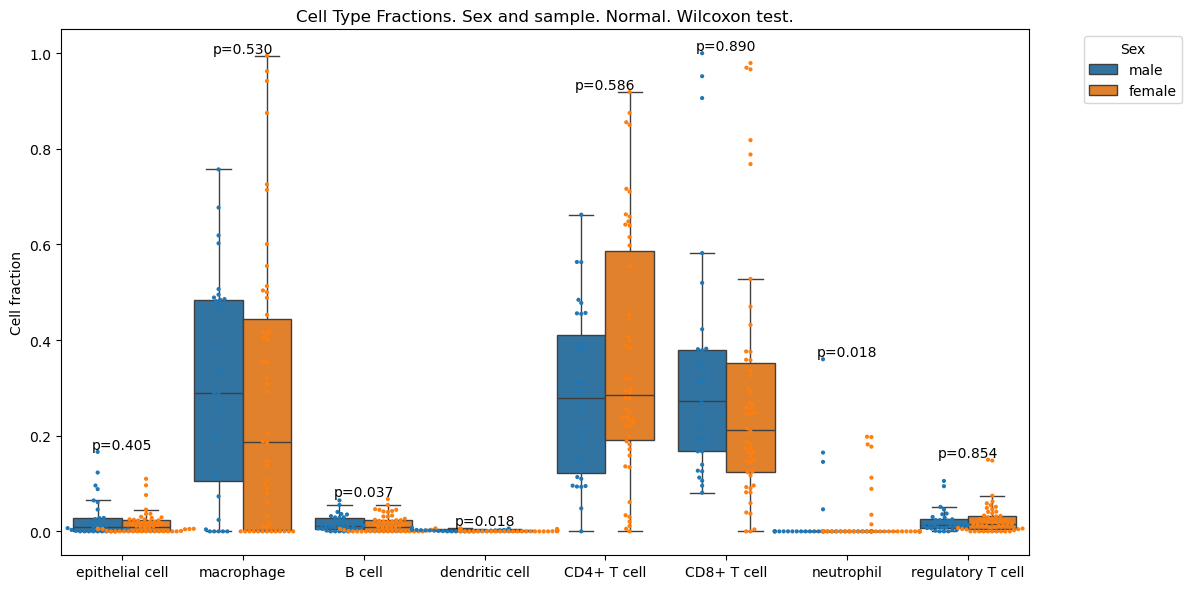

In [68]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_normal.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)




# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_n_allpvalues.png', bbox_inches='tight')

# Show the plot
plt.show()


In [69]:
adata_female = adata[adata.obs["sex"]=="female"]

/tmp/ipykernel_3396411/2393633512.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()
/tmp/ipykernel_3396411/2393633512.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/2393633512.py:9: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categor

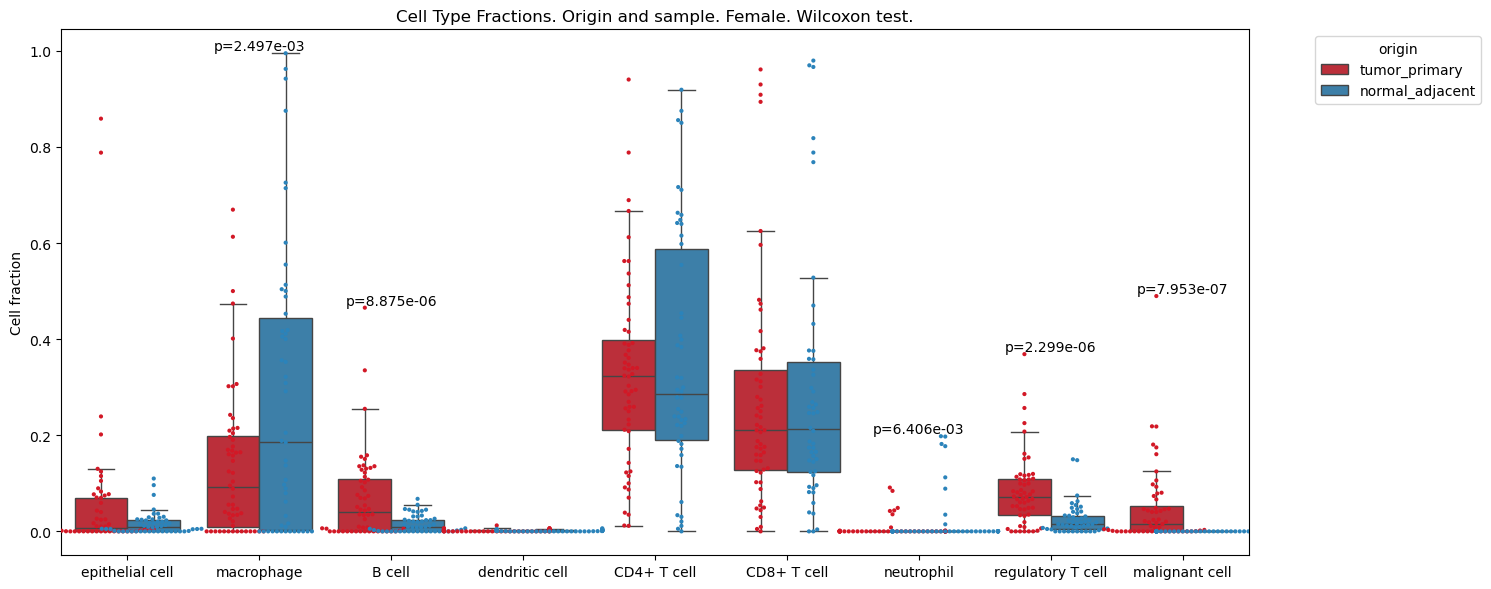

In [70]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_female.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))
custom_palette = {'tumor_primary': '#D21826', 'normal_adjacent': '#2B83BA'}


# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"],palette=custom_palette)

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True,palette=custom_palette)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Origin and sample. Female. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_female.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/3135548865.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()
/tmp/ipykernel_3396411/3135548865.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/3135548865.py:9: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categor

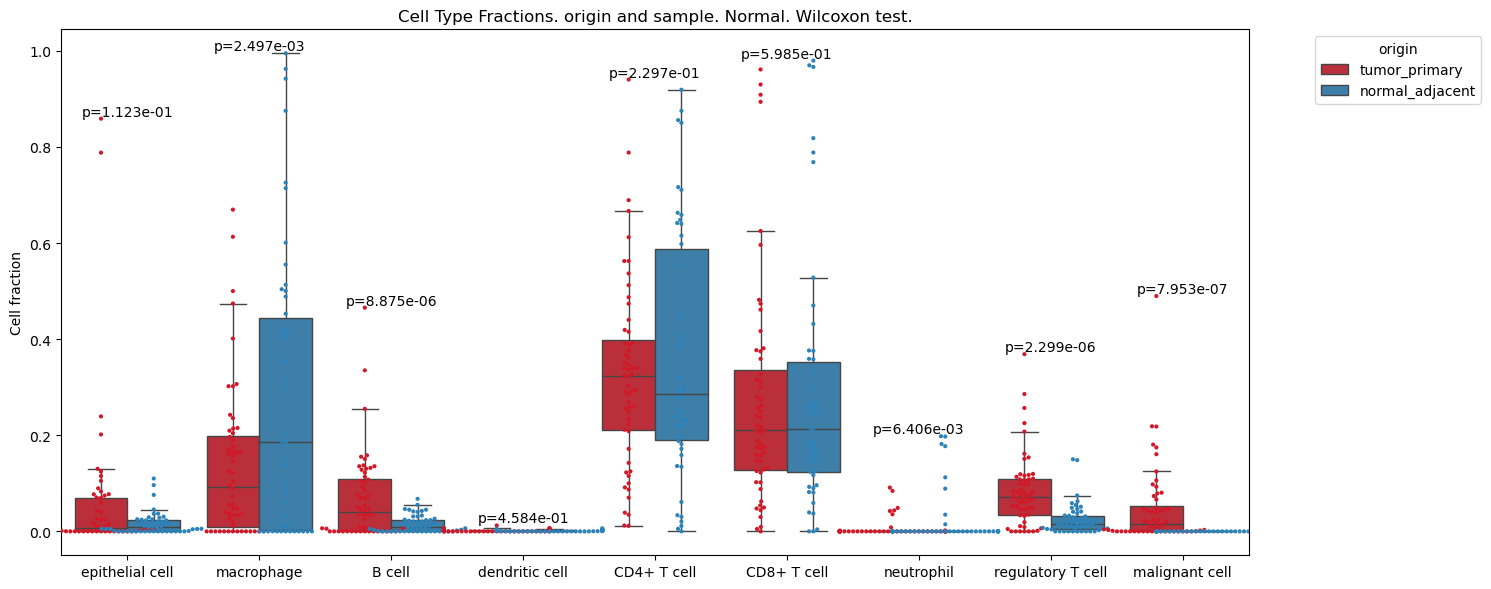

In [71]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_female.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))
custom_palette = {'tumor_primary': '#D21826', 'normal_adjacent': '#2B83BA'}


# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"],palette=custom_palette)

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True,palette=custom_palette)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. origin and sample. Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_female.png', bbox_inches='tight')

# Show the plot
plt.show()


In [72]:
adata_male = adata[adata.obs["sex"]=="male"]

/tmp/ipykernel_3396411/2586780120.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()
/tmp/ipykernel_3396411/2586780120.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/2586780120.py:9: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categor

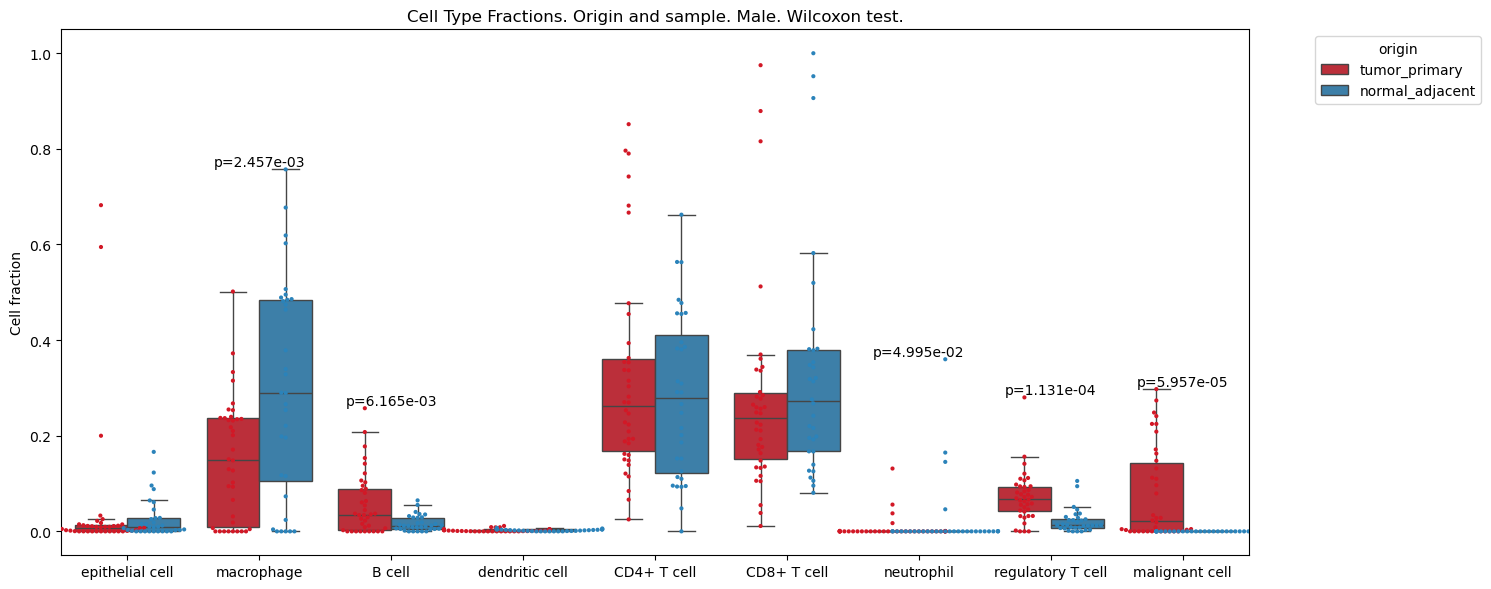

In [73]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_male.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))
# Define the custom red and green palette
custom_palette = {'tumor_primary': '#D21826', 'normal_adjacent': '#2B83BA'}


# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"],palette=custom_palette)

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"],palette=custom_palette, dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Origin and sample. Male. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_male.png', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3396411/3747788100.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()
/tmp/ipykernel_3396411/3747788100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
/tmp/ipykernel_3396411/3747788100.py:9: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/seaborn/categor

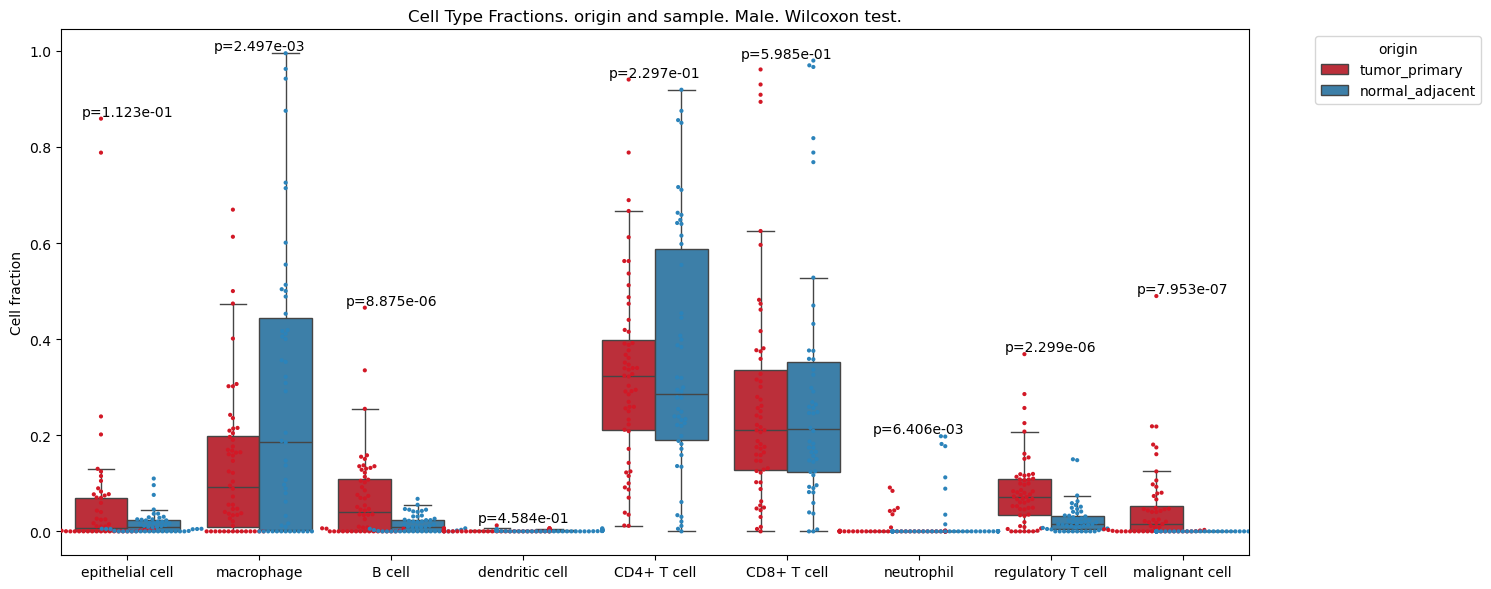

In [74]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_female.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))
custom_palette = {'tumor_primary': '#D21826', 'normal_adjacent': '#2B83BA'}


# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"],palette=custom_palette)

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True,palette=custom_palette)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. origin and sample. Male. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_male.png', bbox_inches='tight')

# Show the plot
plt.show()


In [75]:
adata_cd4 = adata[adata.obs["cell_type"]=="CD4+ T cell"]

/tmp/ipykernel_3396411/4148654479.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_cd4.obs.groupby(['sex', 'origin']).size().unstack(fill_value=0)


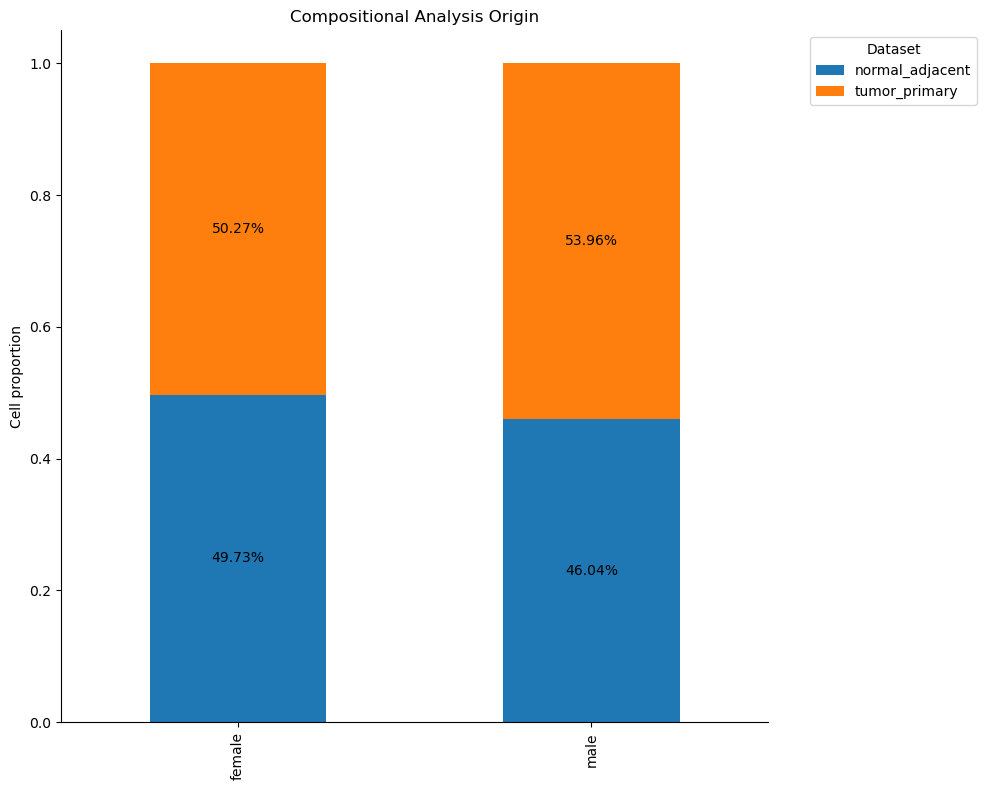

In [76]:
cell_type_counts = adata_cd4.obs.groupby(['sex', 'origin']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Origin')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
#plt.savefig(f'{resDir}/stacked_barplot_origin_cell_type.png', bbox_inches='tight')

# Show the plot
plt.show()
